In [1]:
import warnings
warnings.filterwarnings("ignore")
import MS
import scanpy as sc


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7


### load the dataset

In [2]:
import pysodb
sodb = pysodb.SODB()
adata_dict = sodb.load_dataset('Dataset9_MS_raw')
adata = list(adata_dict.values())[0]

download experiment[Dataset9] in dataset[Dataset9_MS_raw]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313M/313M [00:25<00:00, 13.1MB/s]


load experiment[Dataset9] in dataset[Dataset9_MS_raw] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/ysodb/cache/Dataset9_MS_raw/Dataset9.h5ad


In [3]:
print('data size:',adata.shape)

data size: (53208, 23264)


## cell type clustering

In [4]:
sc.pp.filter_genes(adata, min_cells=50)
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata,key_added='ct')

## MS

In [5]:
# initialize the MS object
ms = MS.MS(
    adata
)

# set the number of scales, default is 15
ms.set_MS_para(
    n_scales=20
)

# construct the context-aware representation
ms.k_representation_mp()


In [6]:
# identify tissue structure given the number of k
ms.run_clustering_normal(
    -0.5 
    # the clustering parameter
    # positive value for the number of clusters
    # negative value for the clustering resolution
)

## output results

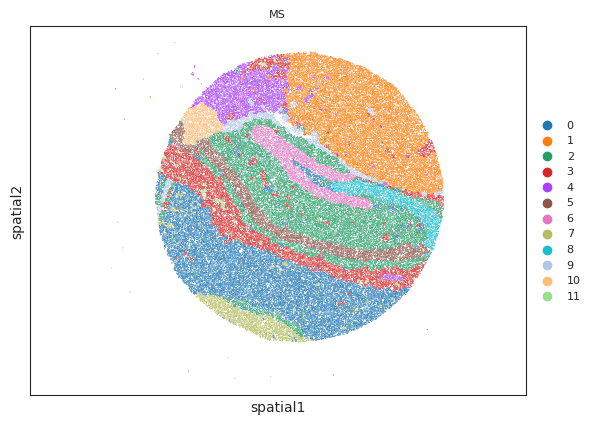

In [7]:
# the result of MS
ms.output_cluster('MS')

## external application: Tissue Visualization via MS-View

In [8]:
ms.run_visualization_normal()

generating color coding...
1.0 0.0


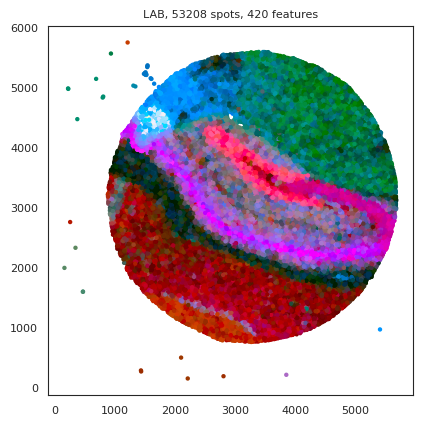

1.0 0.0


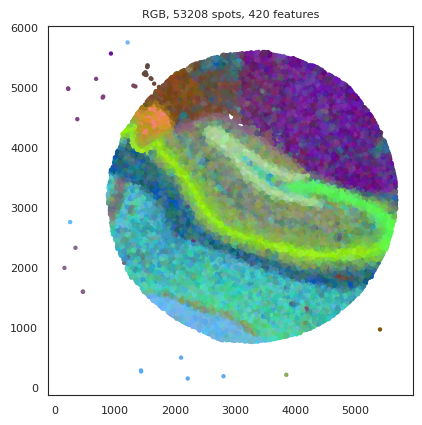

In [9]:
ms.output_visualization_single(
    dot_size=10
    # control the size of cell
)

In [19]:
# save results
ms.adata_MS.write_h5ad(f'process/{data_use}.h5ad')